# Análise de Consumo – Energia, Gás, Água e Trocadores de Calor  
Condomínio Setin Downtown Nova República

Autor: **Gabriel Izar – Conselheiro suplente**  
Contexto: notebook construído para transparência da análise técnica das contas de consumo
(energia, gás, água) e do impacto dos trocadores de calor.

> **Importante:** este notebook reproduz, de forma aberta, os cálculos básicos usados na
> discussão com o conselho. Ajuste caminhos de arquivos e eventuais parâmetros conforme a
> realidade das faturas mais recentes.


## 0. Configuração de ambiente

In [1]:
# Instalação do pandas, biblioteca essencial para manipulação de dados em Python. Executar uma única vez. Deixei a instrução comentada para evitar reinstalações desnecessárias.
# %pip install pandas

In [2]:
# Instalação do matplotlib, biblioteca essencial para visualização de dados em Python. Executar uma única vez. Deixei a instrução comentada para evitar reinstalações desnecessárias.
# %pip install matplotlib

In [5]:
# Instalação do openpyxl, biblioteca necessária para trabalhar com arquivos Excel em Python. Executar uma única vez. Deixei a instrução comentada para evitar reinstalações desnecessárias.
# %pip install openpyxl

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 100

## 1. Configuração de caminhos

In [7]:
# Caminho da planilha principal
# Ajuste este caminho conforme a localização do arquivo na sua máquina.
EXCEL_PATH = "dados_consumo_nova_replublica.xlsx"  # aqui optei por manter a planilha na mesma pasta desse notebook para facilitar o acesso ao arquivo
print(EXCEL_PATH)

dados_consumo_nova_replublica.xlsx


## 2. Carregamento das abas da planilha

In [10]:
# Leitura das abas relevantes
df_energia = pd.read_excel(EXCEL_PATH, sheet_name="Energia")
df_gas     = pd.read_excel(EXCEL_PATH, sheet_name="Gás")
df_agua    = pd.read_excel(EXCEL_PATH, sheet_name="Água")
df_troc    = pd.read_excel(EXCEL_PATH, sheet_name="Trocadores")
df_energia.head(), df_gas.head(), df_agua.head(), df_troc.head()

(  MÊS_REFERÊNCIA DATA_FATURA  DIAS_ENTRE_LEITURAS  CONSUMO_KWH  \
 0        12/2024  2025-01-08                   29        11080   
 1        01/2025  2025-02-10                   33        10440   
 2        02/2025  2025-03-10                   29        14160   
 3        03/2025  2025-04-08                   31        13760   
 4        04/2025  2025-05-08                   28        13040   
 
    TARIFA_TUSD_R$/KWH  VALOR_TUSD_R$  TARIFA_TE_R$/KWH  VALOR_TE_R$  \
 0             0.37317      4134.7236           0.26307    2914.8156   
 1             0.37317      3895.8948           0.26307    2746.4508   
 2             0.37317      5284.0872           0.26307    3725.0712   
 3             0.37317      6667.3200           0.26307    4700.1900   
 4             0.37317      6291.0000           0.26307    4434.8900   
 
    BANDEIRA_AMARELA_R$  BANDEIRA_VERMELHA_R$  COSIP_R$  ICMS_R$  \
 0               154.74                   NaN    583.41  1555.59   
 1                  NaN   

## 3. Funções auxiliares

Vamos padronizar o consumo para um período de 30 dias, já que o intervalo entre leituras
varia de mês a mês. Isso permite comparações mais justas entre períodos.


In [11]:
def padronizar_consumo(df, consumo_col, dias_col, novo_nome):
    """
    Calcula consumo equivalente a 30 dias.

    Consumo_30 = (Consumo / Dias) * 30
    """
    df = df.copy()
    df[novo_nome] = df[consumo_col] / df[dias_col] * 30
    return df

## 4. Energia elétrica – Enel

In [12]:
# Converter MÊS_REFERÊNCIA em data (assumindo formato 'mm/aaaa')
df_energia = df_energia.copy()
df_energia['MES_DT'] = pd.to_datetime(df_energia['MÊS_REFERÊNCIA'], format='%m/%Y')

# Padronizar consumo para 30 dias
df_energia = padronizar_consumo(df_energia,
                                consumo_col='CONSUMO_KWH',
                                dias_col='DIAS_ENTRE_LEITURAS',
                                novo_nome='CONS_PAD_KWH')

df_energia_sorted = df_energia.sort_values('MES_DT')
df_energia_sorted[['MÊS_REFERÊNCIA', 'DIAS_ENTRE_LEITURAS', 'CONSUMO_KWH', 'CONS_PAD_KWH', 'TOTAL_ENERGIA_R$']].head()

,MÊS_REFERÊNCIA,DIAS_ENTRE_LEITURAS,CONSUMO_KWH,CONS_PAD_KWH,TOTAL_ENERGIA_R$
0,12/2024,29,11080,11462.068966,9680.07
1,01/2025,33,10440,9490.909091,9136.08
2,02/2025,29,14160,14648.275862,12173.84
3,03/2025,31,13760,13316.129032,12200.64
4,04/2025,28,13040,13971.428571,11329.86


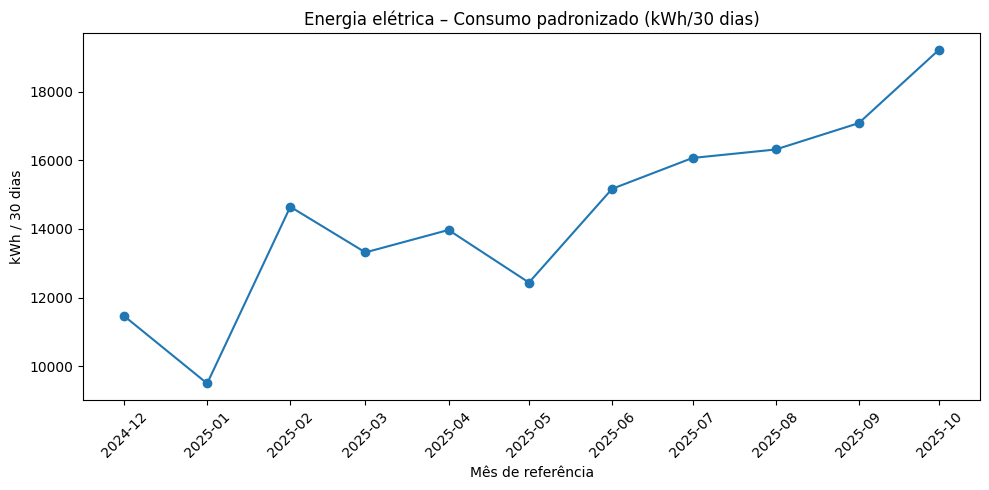

In [13]:
# Gráfico – consumo padronizado de energia (kWh/30 dias)
fig, ax = plt.subplots()
ax.plot(df_energia_sorted['MES_DT'], df_energia_sorted['CONS_PAD_KWH'], marker='o')
ax.set_title("Energia elétrica – Consumo padronizado (kWh/30 dias)")
ax.set_xlabel("Mês de referência")
ax.set_ylabel("kWh / 30 dias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

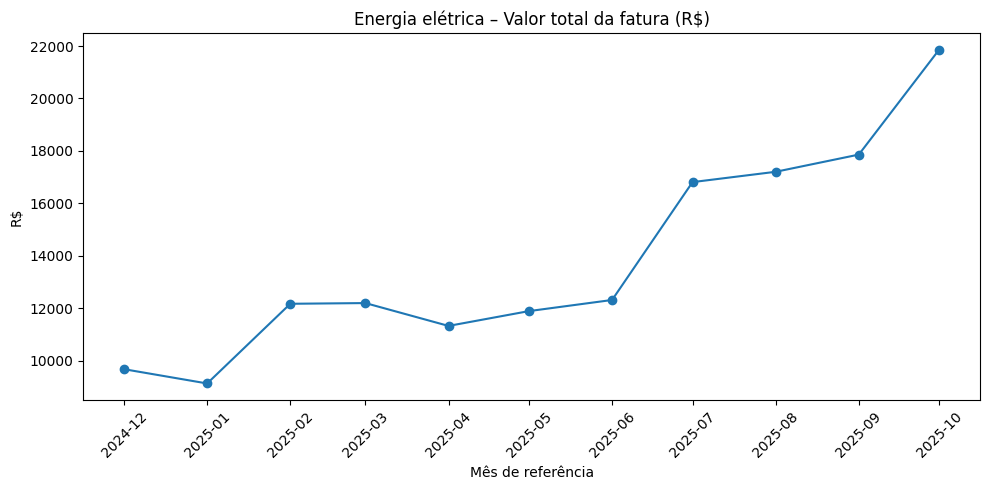

In [14]:
# Gráfico – valor total da fatura de energia
fig, ax = plt.subplots()
ax.plot(df_energia_sorted['MES_DT'], df_energia_sorted['TOTAL_ENERGIA_R$'], marker='o')
ax.set_title("Energia elétrica – Valor total da fatura (R$)")
ax.set_xlabel("Mês de referência")
ax.set_ylabel("R$")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Gás – Comgás

Gás usado exclusivamente para aquecimento central de água das unidades.


In [16]:
df_gas = df_gas.copy()
df_gas['MES_DT'] = pd.to_datetime(df_gas['MÊS_REFERÊNCIA'], format='%m/%Y')
df_gas = padronizar_consumo(df_gas,
                            consumo_col='CONSUMO_M3',
                            dias_col='DIAS_CONSUMO',
                            novo_nome='CONS_PAD_M3')

df_gas_sorted = df_gas.sort_values('MES_DT')
df_gas_sorted[['MÊS_REFERÊNCIA', 'DIAS_CONSUMO', 'CONSUMO_M3', 'CONS_PAD_M3', 'VALOR_GÁS_R$']].head()

,MÊS_REFERÊNCIA,DIAS_CONSUMO,CONSUMO_M3,CONS_PAD_M3,VALOR_GÁS_R$
9,02/2025,29,1062.650,1099.293103,13522.52
8,03/2025,33,1040.895,946.268182,13338.04
7,04/2025,28,1251.228,1340.601429,15121.72
6,05/2025,30,1500.000,1500.000000,19554.22
5,06/2025,29,1248.427,1291.476207,15097.96


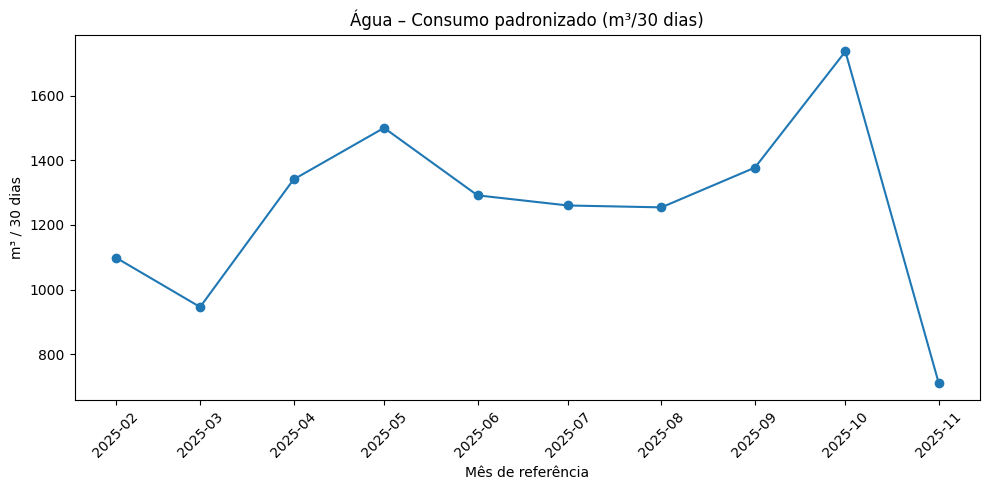

In [21]:
fig, ax = plt.subplots()
ax.plot(df_gas_sorted['MES_DT'], df_gas_sorted['CONS_PAD_M3'], marker='o')
ax.set_title("Água – Consumo padronizado (m³/30 dias)")
ax.set_xlabel("Mês de referência")
ax.set_ylabel("m³ / 30 dias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Água – Sabesp

In [19]:
df_agua = df_agua.copy()
if not np.issubdtype(df_agua['MÊS_REFERÊNCIA'].dtype, np.datetime64):
    df_agua['MES_DT'] = pd.to_datetime(df_agua['MÊS_REFERÊNCIA'], errors='coerce')
else:
    df_agua['MES_DT'] = df_agua['MÊS_REFERÊNCIA']

df_agua = df_agua.dropna(subset=['CONSUMO_M3'])
df_agua = padronizar_consumo(df_agua,
                             consumo_col='CONSUMO_M3',
                             dias_col='DIAS_CONSUMO',
                             novo_nome='CONS_PAD_M3')

df_agua_sorted = df_agua.sort_values('MES_DT')
df_agua_sorted[['MÊS_REFERÊNCIA', 'DIAS_CONSUMO', 'CONSUMO_M3', 'CONS_PAD_M3', 'VALOR_R$']].head()

C:\Users\gabri\AppData\Local\Temp\ipykernel_132\1333622043.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_agua['MES_DT'] = pd.to_datetime(df_agua['MÊS_REFERÊNCIA'], errors='coerce')


,MÊS_REFERÊNCIA,DIAS_CONSUMO,CONSUMO_M3,CONS_PAD_M3,VALOR_R$
1,01/2025,31.0,1216.0,1176.774194,26094.47
2,02/2025,30.0,1600.0,1600.000000,26094.47
3,03/2025,30.0,1682.0,1682.000000,26094.47
4,04/2025,31.0,1553.0,1502.903226,26094.47
5,05/2025,30.0,1398.0,1398.000000,26094.47


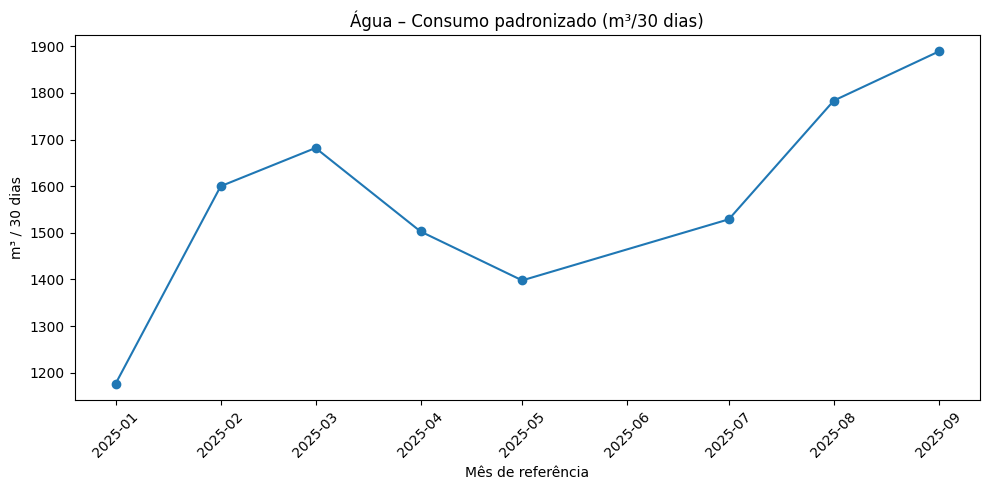

In [20]:
fig, ax = plt.subplots()
ax.plot(df_agua_sorted['MES_DT'], df_agua_sorted['CONS_PAD_M3'], marker='o')
ax.set_title("Água – Consumo padronizado (m³/30 dias)")
ax.set_xlabel("Mês de referência")
ax.set_ylabel("m³ / 30 dias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Relação entre água e gás

In [23]:
df_ag = pd.merge(
    df_agua_sorted[['MES_DT', 'CONS_PAD_M3']].rename(columns={'CONS_PAD_M3': 'AGUA_M3_30'}),
    df_gas_sorted[['MES_DT', 'CONS_PAD_M3']].rename(columns={'CONS_PAD_M3': 'GAS_M3_30'}),
    on='MES_DT',
    how='inner'
).sort_values('MES_DT')

df_ag

,MES_DT,AGUA_M3_30,GAS_M3_30
0,2025-02-01,1600.000000,1099.293103
1,2025-03-01,1682.000000,946.268182
2,2025-04-01,1502.903226,1340.601429
3,2025-05-01,1398.000000,1500.000000
4,2025-07-01,1529.032258,1260.101613
5,2025-08-01,1783.548387,1254.335000
6,2025-09-01,1889.000000,1377.215172


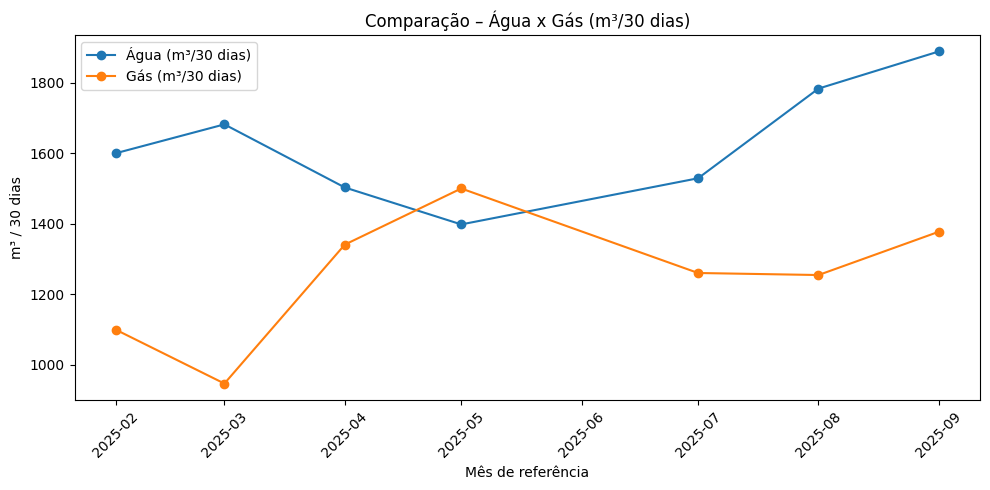

In [24]:
fig, ax = plt.subplots()
ax.plot(df_ag['MES_DT'], df_ag['AGUA_M3_30'], marker='o', label='Água (m³/30 dias)')
ax.plot(df_ag['MES_DT'], df_ag['GAS_M3_30'], marker='o', label='Gás (m³/30 dias)')
ax.set_title("Comparação – Água x Gás (m³/30 dias)")
ax.set_xlabel("Mês de referência")
ax.set_ylabel("m³ / 30 dias")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
df_ag['RAZAO_GAS_POR_AGUA'] = df_ag['GAS_M3_30'] / df_ag['AGUA_M3_30']
df_ag[['MES_DT', 'AGUA_M3_30', 'GAS_M3_30', 'RAZAO_GAS_POR_AGUA']]

,MES_DT,AGUA_M3_30,GAS_M3_30,RAZAO_GAS_POR_AGUA
0,2025-02-01,1600.000000,1099.293103,0.687058
1,2025-03-01,1682.000000,946.268182,0.562585
2,2025-04-01,1502.903226,1340.601429,0.892008
3,2025-05-01,1398.000000,1500.000000,1.072961
4,2025-07-01,1529.032258,1260.101613,0.824117
5,2025-08-01,1783.548387,1254.335000,0.703281
6,2025-09-01,1889.000000,1377.215172,0.729071


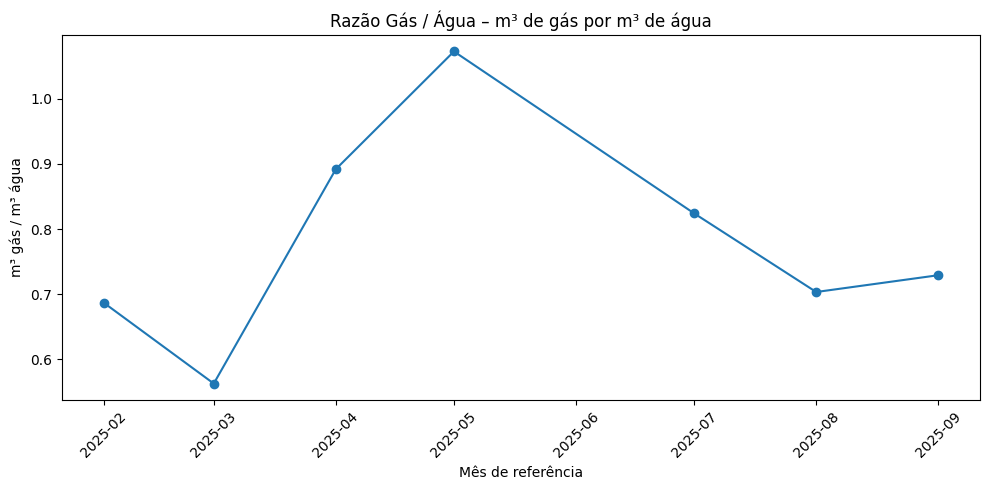

In [26]:
fig, ax = plt.subplots()
ax.plot(df_ag['MES_DT'], df_ag['RAZAO_GAS_POR_AGUA'], marker='o')
ax.set_title("Razão Gás / Água – m³ de gás por m³ de água")
ax.set_xlabel("Mês de referência")
ax.set_ylabel("m³ gás / m³ água")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Trocadores de calor – série de custos

In [27]:
df_troc = df_troc.copy()
if 'MÊS_REFERÊNCIA' in df_troc.columns:
    df_troc['MES_DT'] = pd.to_datetime(df_troc['MÊS_REFERÊNCIA'], format='%m/%Y')

df_troc_sorted = df_troc.sort_values('MES_DT')
df_troc_sorted

,MÊS_REFERÊNCIA,DATA_FATURA,VALOR,MES_DT
0,07/2025,2025-07-11,3900,2025-07-01
1,08/2025,2025-08-22,4900,2025-08-01
2,09/2025,2025-09-24,4900,2025-09-01
3,10/2025,2025-10-03,4900,2025-10-01
4,11/2025,2025-11-03,4900,2025-11-01


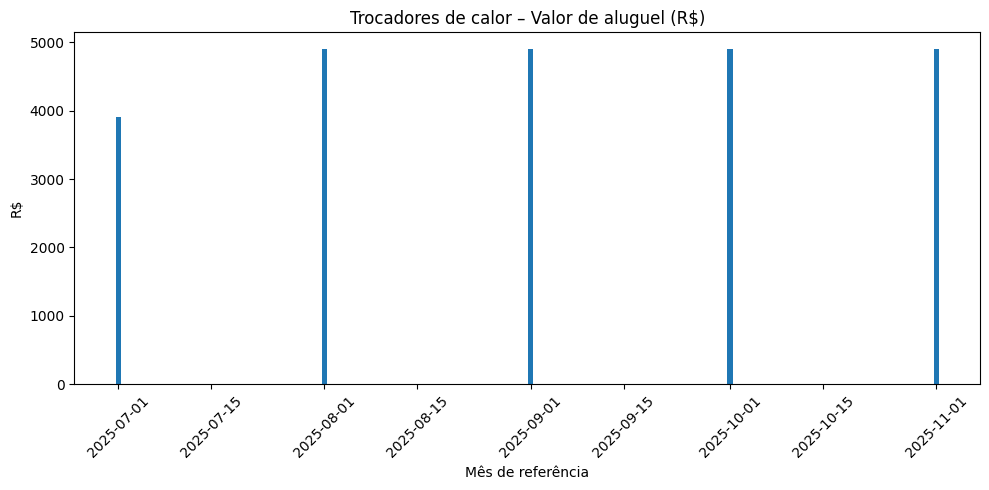

In [29]:
fig, ax = plt.subplots()
ax.bar(df_troc_sorted['MES_DT'], df_troc_sorted['VALOR'])
ax.set_title("Trocadores de calor – Valor de aluguel (R$)")
ax.set_xlabel("Mês de referência")
ax.set_ylabel("R$")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Notas de interpretação

- A análise financeira pura é **foto de momento** (valor pago em um mês).
- A análise de consumo padronizado é **filme** (comportamento ao longo do tempo).
- O aumento do custo global não prova, por si só, desperdício ou má gestão.
- A queda relevante do consumo e do valor de gás em novembro/2025 é evidência concreta
  de que o sistema de aquecimento está se tornando mais eficiente.
